In [2]:
import pandas as pd
import numpy as np
import torch
import h5py
import os
import matplotlib.pyplot as plt
from torchvision.transforms import functional as Func
from torchvision import transforms as T
from PIL import Image

In [3]:
PATH = '/home/jmryan/teams/dsc-180a---a14-[88137]/seg_images_fixed.hdf5'
DF_PATH = '/home/jmryan/teams/dsc-180a---a14-[88137]/data_fixed.csv'
OLD_PATH = '/home/jmryan/teams/dsc-180a---a14-[88137]/df_bnpp_datapaths.csv'
DATA_DIR_PATH = '/home/jmryan/teams/dsc-180a---a14-[88137]/bnpp_224_pandas/'
IM_PATH = '/home/jmryan/teams/dsc-180a---a14-[88137]/images_fixed.hdf5'


In [4]:
TEST_PATH = '/home/jmryan/private/DSC180/A/test/testdata.csv'
TRAIN_PATH = '/home/jmryan/private/DSC180/A/train/traindata.csv'
VAL_PATH = '/home/jmryan/private/DSC180/A/val/valdata.csv'

In [56]:
test = pd.read_csv(TEST_PATH)
val = pd.read_csv(VAL_PATH)
train = pd.read_csv(TRAIN_PATH)

## Setup

In [58]:
full = pd.concat([test,val,train])

In [67]:
full['id'] = full['filepaths'].apply(lambda x: x.split('/')[0])

In [78]:
df = pd.read_csv(DF_PATH)
df = df.reset_index()
df.columns = ['index','id'] + list(df.columns)[2:]

In [140]:
merged = df.merge(full, how='inner', on='id').set_index('index')

In [3]:
h5 = h5py.File(PATH, 'r')

In [4]:
im = h5['training_images']

In [80]:
im.shape

(16619, 256, 256, 6)

In [5]:
im2 = h5py.File(PATH, 'r')

In [8]:
im2 = im2['training_images']

In [9]:
im2

<HDF5 dataset "training_images": shape (16619, 256, 256, 6), type "<f4">

## Action

In [129]:
def fix_segments(im):
    segment = np.add(np.add(im[:,:,0], im[:,:,1]) ,im[:,:,2]) > im[:,:,1].mean()
    return torch.tensor(segment.astype(float))

In [125]:
def change_im(im):
    pil = T.ToPILImage()
    tens = T.ToTensor()
    resize = T.Resize([224, 224], interpolation=T.InterpolationMode.BILINEAR)
    im = tens(resize(pil(im)))[0]
    return im

In [133]:
first_im = torch.load(DATA_DIR_PATH + merged.filepaths[0])

In [136]:
first_im.shape

torch.Size([224, 224])

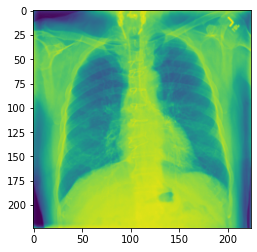

In [134]:
plt.imshow(torch.load(DATA_DIR_PATH + merged.filepaths[0]))

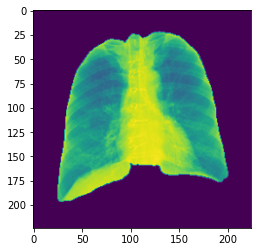

In [135]:
plt.imshow(first_im * change_im(fix_segments(im[0])))

In [145]:
for i in range(len(im)):
    row = merged.iloc[i]
    print(row)
    full_im = torch.load(DATA_DIR_PATH + row.filepaths)
    break

id                                            Abachug_50267230_img1
bnpp                                                          418.0
cardio_edema                                                      1
bmi                                                           25.51
cr                                                             0.61
PNA                                                               1
AcuteHF                                                           0
Unnamed: 0                                                        0
bnpp_value_log                                             2.621176
heart                                                             1
filepaths         Abachug_50267230_img1/Abachug_50267230_img1_22...
Name: 0, dtype: object


In [143]:
len(im)

16619

In [142]:
merged.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            16609, 16610, 16611, 16612, 16613, 16614, 16615, 16616, 16617,
            16618],
           dtype='int64', name='index', length=16619)

In [92]:
first_im * segment

ValueError: operands could not be broadcast together with shapes (224,224) (256,256) 

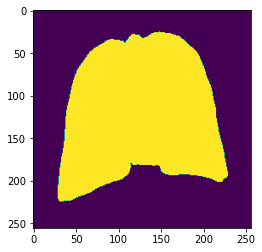

In [33]:
plt.imshow(np.add(np.add(im[0][:,:,0], im[0][:,:,1]) ,im[0][:,:,2]) > 0.18108265)

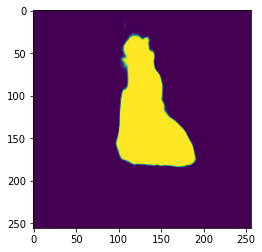

In [18]:
plt.imshow([im[0][:,:])

In [9]:
os.getcwd()

'/home/jmryan/private/DSC180/A'

In [147]:
tmp = pd.read_csv('/home/jmryan/teams/dsc-180a---a14-[88137]/segmented_datapaths_meta.csv')

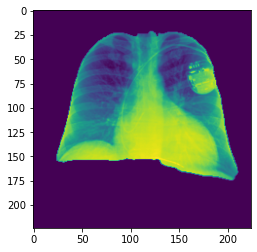

In [152]:
plt.imshow(torch.load(tmp.seg_paths[len(tmp) - 1]))